In [1]:
library(Seurat)
library(arrow)
library(dplyr)

rawfile = 'cellsAll.feather'
name = 'LMCarT'

    rawdata = read_feather(rawfile) %>% as.data.frame()
    rownames(rawdata) = rawdata$Gene
    id = which(colnames(rawdata) == "Gene")
    rawdata = rawdata[, -id]
    metadata = read.csv(paste0(name, "_meta.txt"), row.names = 1, 
        stringsAsFactors = FALSE)

    rawdata = rawdata[, colnames(rawdata) %in% rownames(metadata)]

    seurat = CreateSeuratObject(rawdata)
    seurat@meta.data = metadata
    seurat



Loading required package: ggplot2

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar

Loading required package: cowplot


********************************************************

Note: As of version 1.0.0, cowplot does not change the

  default ggplot2 theme anymore. To recover the previous

  behavior, execute:
  theme_set(theme_cowplot())

********************************************************


Loading required package: Matrix

See arrow_info() for available features


Attaching package: 'arrow'


The following object is masked from 'package:utils':

    timestamp



Attaching package: 'dplyr'


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




An object of class seurat in project SeuratProject 
 17039 genes across 53901 samples.

In [2]:
pyProcess = function (seurat) 
{
    seurat = NormalizeData(seurat)
    seurat = FindVariableGenes(seurat, do.plot = FALSE)
    seurat = ScaleData(seurat, genes.use = seurat@var.genes, 
        vars.to.regress = c("n_genes"), model.use = "poisson")
    seurat = RunPCA(seurat, dims.use = seurat@var.genes, do.print = FALSE)
    seurat = RunUMAP(seurat, dims.use = 1:20)
    seurat@meta.data$UMAP1 = seurat@dr$umap@cell.embeddings[, 
        1]
    seurat@meta.data$UMAP2 = seurat@dr$umap@cell.embeddings[, 
        2]
    seurat
}

seurat = pyProcess(seurat)

Regressing out: n_genes




Time Elapsed:  1.90656453371048 mins

Scaling data matrix



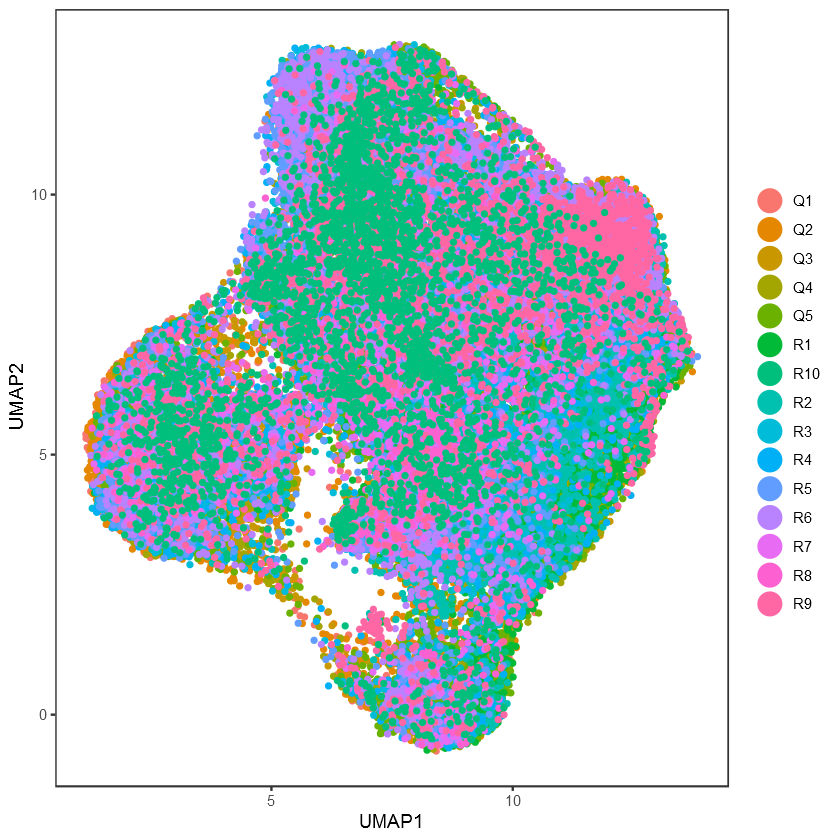

In [3]:
DimPlot(seurat, 'umap')

In [4]:
saveRDS(seurat, 'initialseurat.RDS')